# Classification (supervised learning)

The notebook aims to study and implement classification (supervised learning) using "sklearn". The iris dataset will be used to classify.


## Acknowledgments

- Used dataset: https://archive.ics.uci.edu/ml/datasets/iris

- Inquiries: mauricio.antelis@tec.mx


# Importing libraries

In [18]:
# Import the packages that we will be using
import numpy as np                  # For array
import pandas as pd                 # For data handling
import seaborn as sns               # For advanced plotting
import matplotlib.pyplot as plt     # For showing plots

# Note: specific functions of the "sklearn" package will be imported when needed to show concepts easily


In [19]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Importing data

In [28]:
# Define the col names for the iris dataset
colnames = ["Sepal_Length", "Sepal_Width","Petal_Length","Petal_Width", "Flower"]

# Dataset url
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

# Load the dataset from HHDD
dataset  = pd.read_csv(url, header = None, names = colnames )

dataset


,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Flower
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


# Undertanding and preprocessing the data

1. Get a general 'feel' of the data


In [29]:
# Print dataset
print(dataset)

     Sepal_Length  Sepal_Width  Petal_Length  Petal_Width          Flower
0             5.1          3.5           1.4          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2           1.3          0.2     Iris-setosa
3             4.6          3.1           1.5          0.2     Iris-setosa
4             5.0          3.6           1.4          0.2     Iris-setosa
..            ...          ...           ...          ...             ...
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica

[150 rows x 5 columns]


In [30]:
# Print dataset shape
print(dataset.shape)

(150, 5)


In [31]:
# Print column names
print(dataset.columns)

Index(['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width', 'Flower'], dtype='object')


2. Drop rows with any missing values


In [32]:
# Drop na
dataset.dropna(inplace=True)

3. Encoding the class label categorical column: from string to num


In [33]:
# Encoding the categorical column: {"Iris-setosa":0, "Iris-versicolor":1, "Iris-virginica":2}
flower_encoding = {"Iris-setosa": 0, "Iris-versicolor": 1, "Iris-virginica": 2}
dataset['Flower'] = dataset['Flower'].replace(flower_encoding)

#Visualize the dataset
print(dataset.head())


   Sepal_Length  Sepal_Width  Petal_Length  Petal_Width  Flower
0           5.1          3.5           1.4          0.2       0
1           4.9          3.0           1.4          0.2       0
2           4.7          3.2           1.3          0.2       0
3           4.6          3.1           1.5          0.2       0
4           5.0          3.6           1.4          0.2       0


<ipython-input-33-81705cff7746>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset['Flower'] = dataset['Flower'].replace(flower_encoding)


Now the label/category is numeric




```
# Tiene formato de código
```

4. Discard columns that won't be used


In [26]:
# Drop out non necesary columns

5. Scatter plot of the data

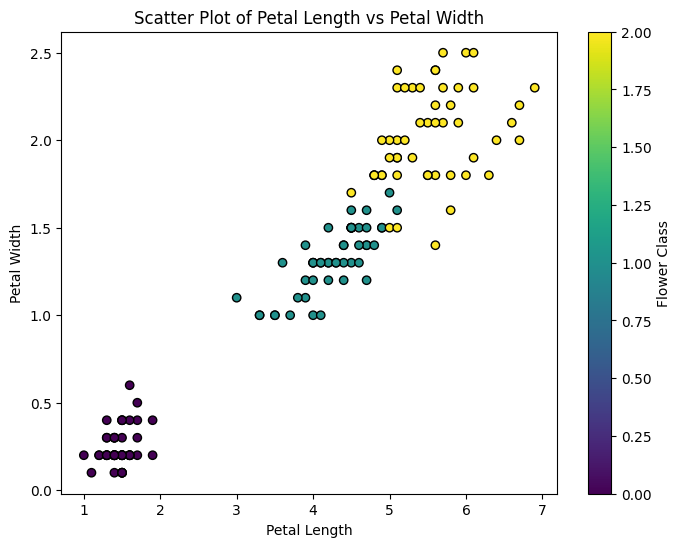

In [34]:
import matplotlib.pyplot as plt

# Crear un scatter plot de Petal_Length vs Petal_Width
plt.figure(figsize=(8,6))
plt.scatter(dataset['Petal_Length'], dataset['Petal_Width'], c=dataset['Flower'], cmap='viridis', edgecolor='k')
plt.title('Scatter Plot of Petal Length vs Petal Width')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.colorbar(label='Flower Class')
plt.show()


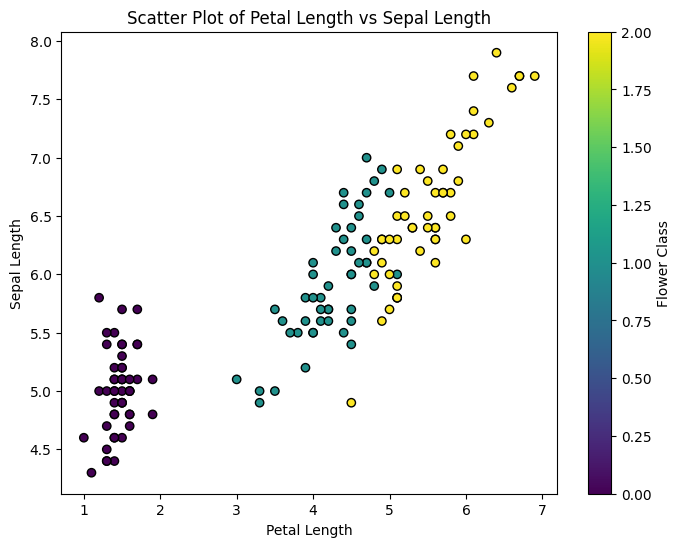

In [35]:
# Scatter plot of Petal_Length vs Sepal_Length
plt.figure(figsize=(8,6))
plt.scatter(dataset['Petal_Length'], dataset['Sepal_Length'], c=dataset['Flower'], cmap='viridis', edgecolor='k')
plt.title('Scatter Plot of Petal Length vs Sepal Length')
plt.xlabel('Petal Length')
plt.ylabel('Sepal Length')
plt.colorbar(label='Flower Class')
plt.show()



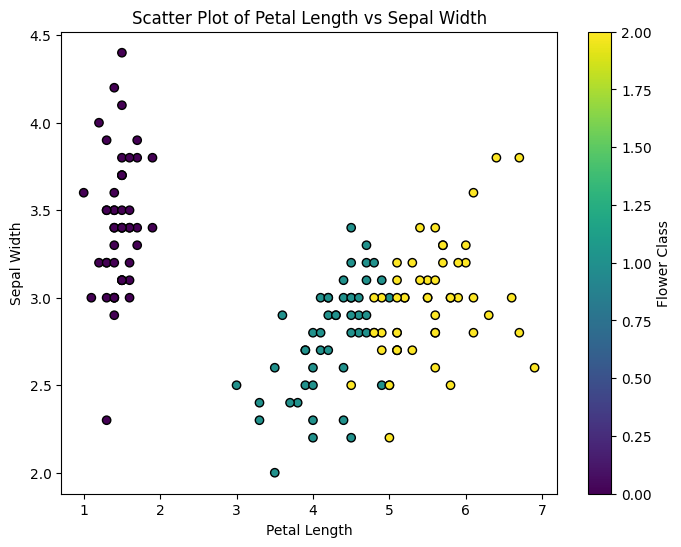

In [36]:
# Scatter plot of Petal_Length vs Sepal_Width
plt.figure(figsize=(8,6))
plt.scatter(dataset['Petal_Length'], dataset['Sepal_Width'], c=dataset['Flower'], cmap='viridis', edgecolor='k')
plt.title('Scatter Plot of Petal Length vs Sepal Width')
plt.xlabel('Petal Length')
plt.ylabel('Sepal Width')
plt.colorbar(label='Flower Class')
plt.show()



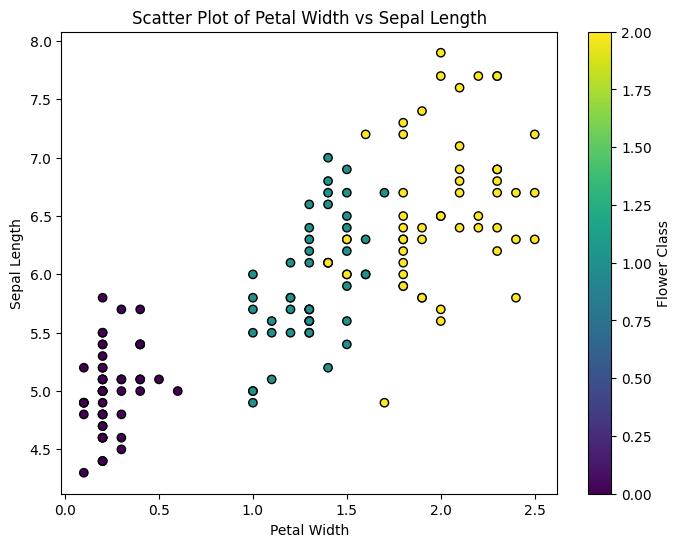

In [37]:
# Scatter plot of Petal_Width vs Sepal_Length
plt.figure(figsize=(8,6))
plt.scatter(dataset['Petal_Width'], dataset['Sepal_Length'], c=dataset['Flower'], cmap='viridis', edgecolor='k')
plt.title('Scatter Plot of Petal Width vs Sepal Length')
plt.xlabel('Petal Width')
plt.ylabel('Sepal Length')
plt.colorbar(label='Flower Class')
plt.show()



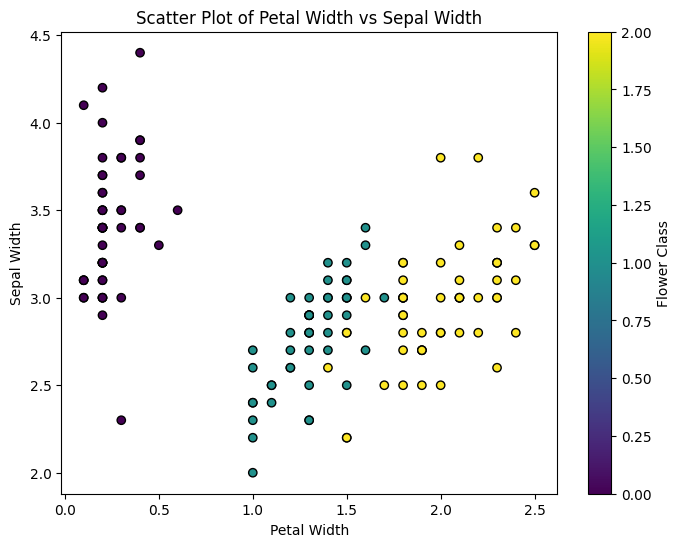

In [38]:
# Scatter plot of Petal_Width vs Sepal_Width
plt.figure(figsize=(8,6))
plt.scatter(dataset['Petal_Width'], dataset['Sepal_Width'], c=dataset['Flower'], cmap='viridis', edgecolor='k')
plt.title('Scatter Plot of Petal Width vs Sepal Width')
plt.xlabel('Petal Width')
plt.ylabel('Sepal Width')
plt.colorbar(label='Flower Class')
plt.show()



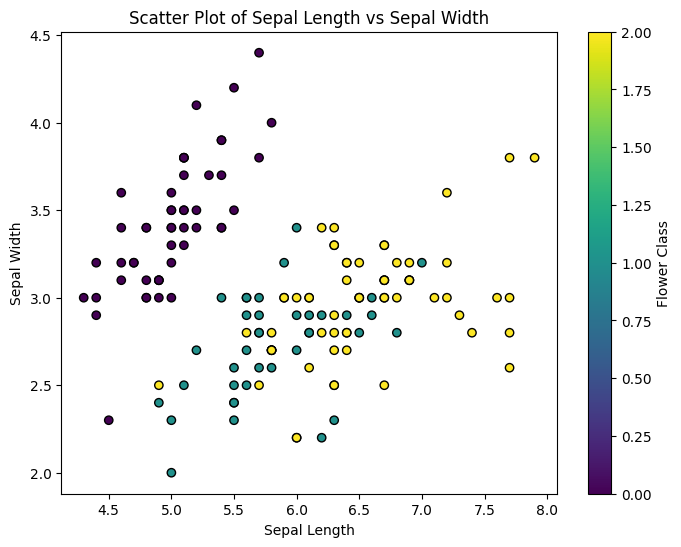

In [39]:
# Scatter plot of Sepal_Length vs Sepal_Width
plt.figure(figsize=(8,6))
plt.scatter(dataset['Sepal_Length'], dataset['Sepal_Width'], c=dataset['Flower'], cmap='viridis', edgecolor='k')
plt.title('Scatter Plot of Sepal Length vs Sepal Width')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.colorbar(label='Flower Class')
plt.show()



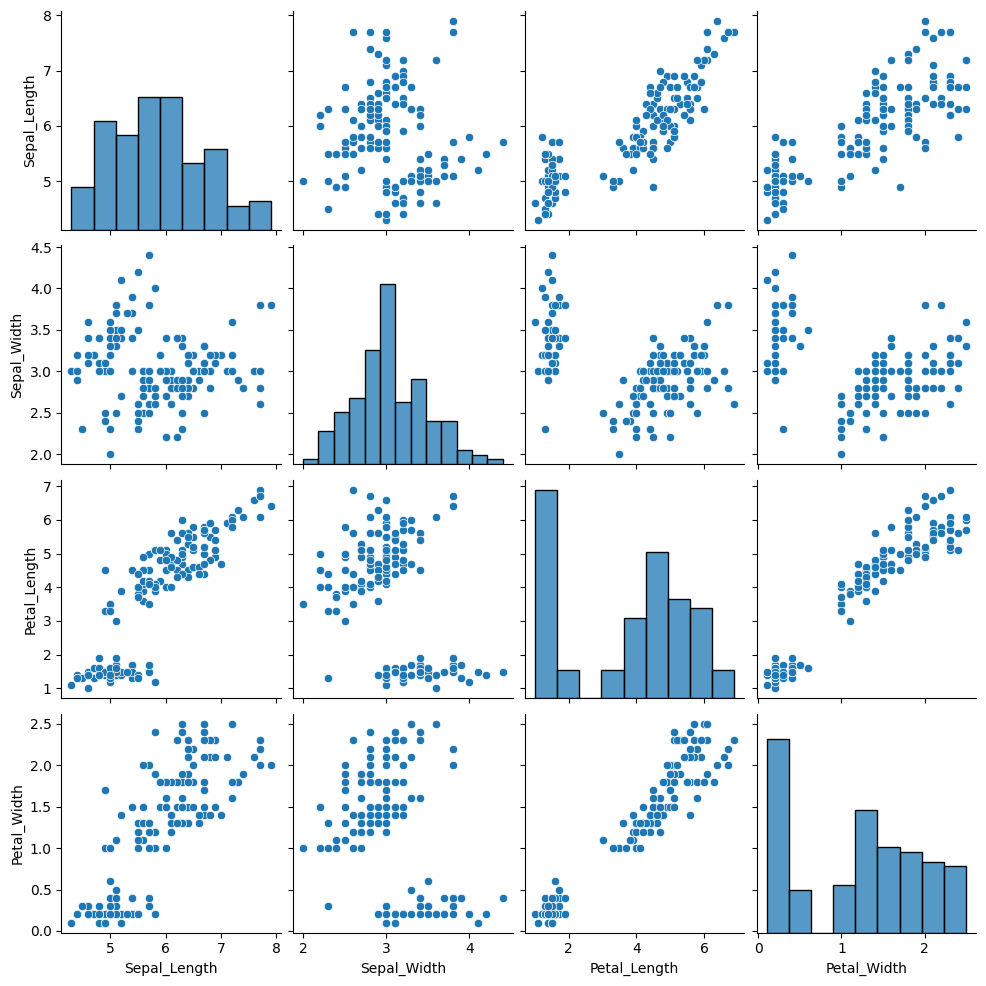

In [40]:
# Pairplot: Scatterplot of all variables (not the flower type)
sns.pairplot(dataset.drop('Flower', axis=1))
plt.show()



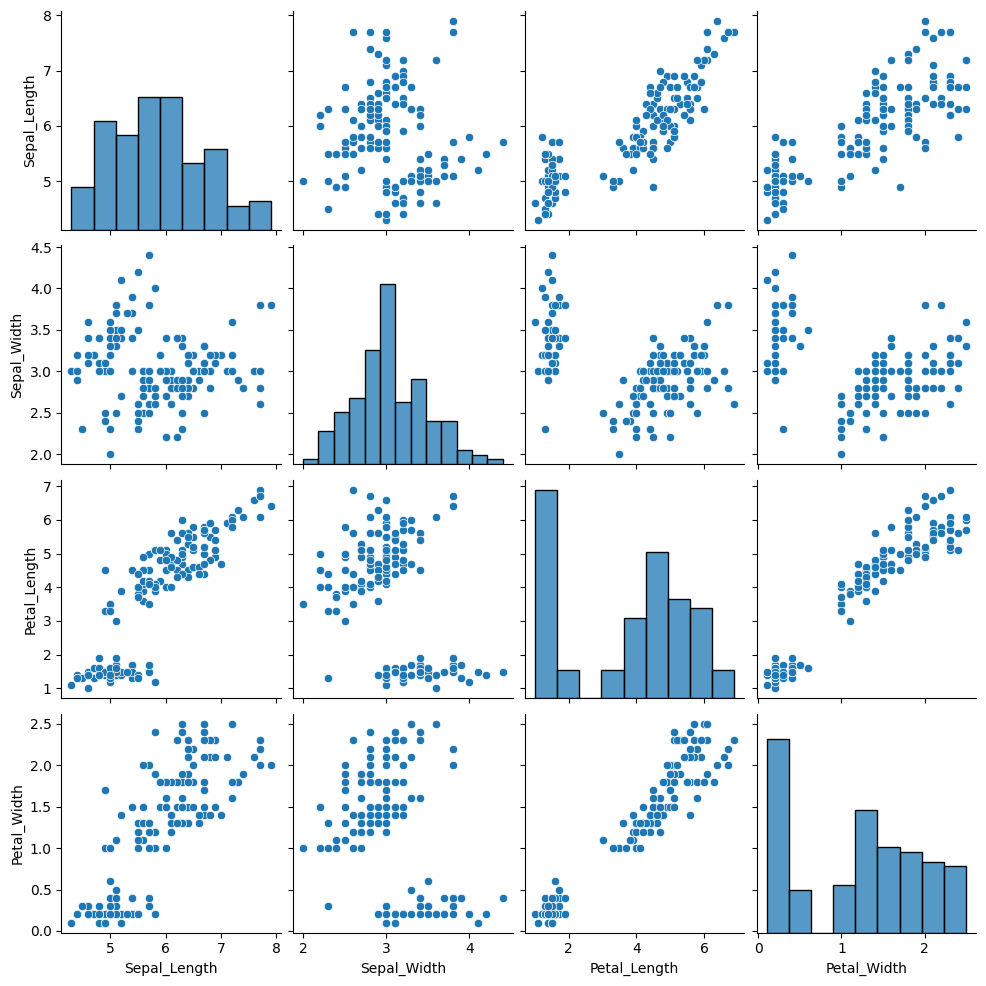

In [41]:
# Pairplot: Scatterplot of all variables (not the flower type)

sns.pairplot(dataset.drop('Flower', axis=1))
plt.show()


6. Scatter plot of the data asigning each point to the cluster it belongs to ¡¡

In [43]:
# Get dataframes for each real cluster
iris_setosa_df = dataset[dataset['Flower'] == 0]
iris_versicolor_df = dataset[dataset['Flower'] == 1]
iris_virginica_df = dataset[dataset['Flower'] == 2]

# Visualizar los primeros registros de cada DataFrame
print("Iris-setosa cluster:")
print(iris_setosa_df.head())

print("\nIris-versicolor cluster:")
print(iris_versicolor_df.head())

print("\nIris-virginica cluster:")
print(iris_virginica_df.head())



Iris-setosa cluster:
   Sepal_Length  Sepal_Width  Petal_Length  Petal_Width  Flower
0           5.1          3.5           1.4          0.2       0
1           4.9          3.0           1.4          0.2       0
2           4.7          3.2           1.3          0.2       0
3           4.6          3.1           1.5          0.2       0
4           5.0          3.6           1.4          0.2       0

Iris-versicolor cluster:
    Sepal_Length  Sepal_Width  Petal_Length  Petal_Width  Flower
50           7.0          3.2           4.7          1.4       1
51           6.4          3.2           4.5          1.5       1
52           6.9          3.1           4.9          1.5       1
53           5.5          2.3           4.0          1.3       1
54           6.5          2.8           4.6          1.5       1

Iris-virginica cluster:
     Sepal_Length  Sepal_Width  Petal_Length  Petal_Width  Flower
100           6.3          3.3           6.0          2.5       2
101           5.8     

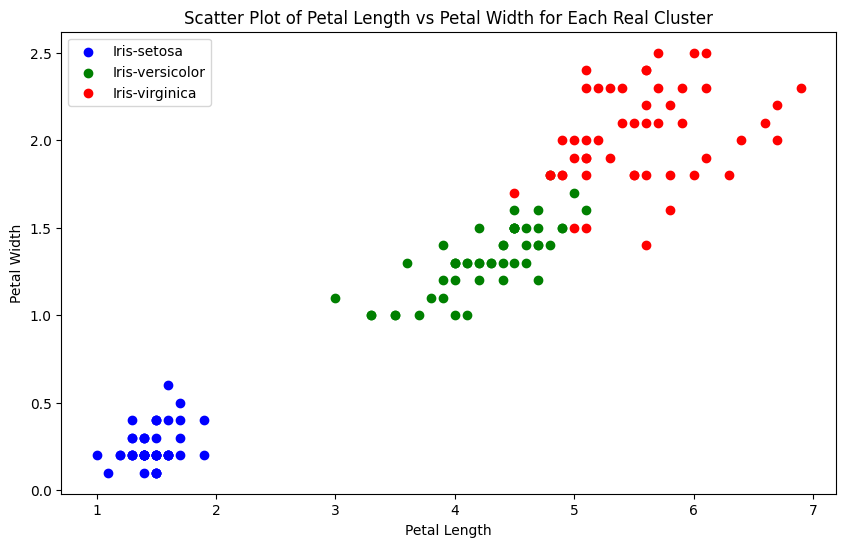

In [44]:
# Scatter plot of each real cluster for Petal
plt.figure(figsize=(10, 6))

# Iris-setosa
plt.scatter(iris_setosa_df['Petal_Length'], iris_setosa_df['Petal_Width'], label='Iris-setosa', color='blue')

# Iris-versicolor
plt.scatter(iris_versicolor_df['Petal_Length'], iris_versicolor_df['Petal_Width'], label='Iris-versicolor', color='green')

# Iris-virginica
plt.scatter(iris_virginica_df['Petal_Length'], iris_virginica_df['Petal_Width'], label='Iris-virginica', color='red')

# Añadir etiquetas y título
plt.title('Scatter Plot of Petal Length vs Petal Width for Each Real Cluster')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.legend()

# Mostrar el gráfico
plt.show()



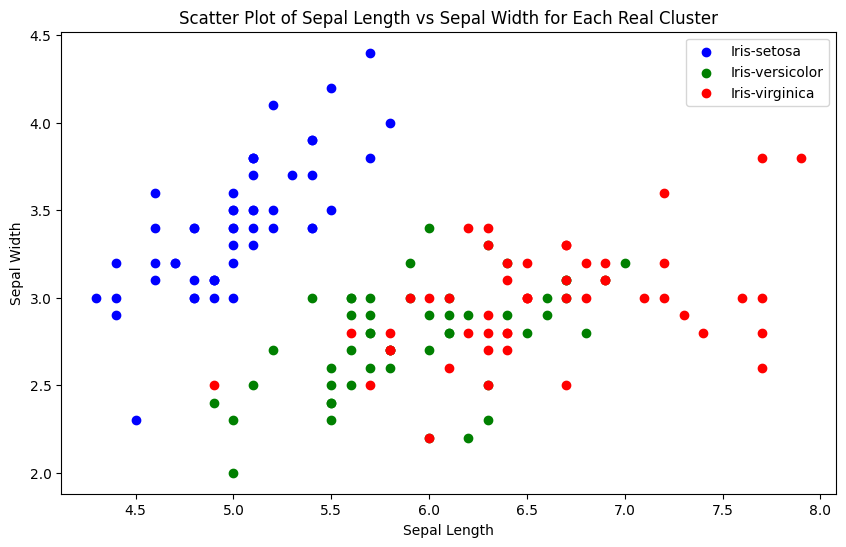

In [46]:
# Scatter plot of each real cluster for Sepal
plt.figure(figsize=(10, 6))

# Iris-setosa
plt.scatter(iris_setosa_df['Sepal_Length'], iris_setosa_df['Sepal_Width'], label='Iris-setosa', color='blue')

# Iris-versicolor
plt.scatter(iris_versicolor_df['Sepal_Length'], iris_versicolor_df['Sepal_Width'], label='Iris-versicolor', color='green')

# Iris-virginica
plt.scatter(iris_virginica_df['Sepal_Length'], iris_virginica_df['Sepal_Width'], label='Iris-virginica', color='red')

# etiquetas y título
plt.title('Scatter Plot of Sepal Length vs Sepal Width for Each Real Cluster')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend()

# Mostrar el gráfico
plt.show()



Recall that for this dataset we know in advance the class to which each point belongs to

# Get variables **X** and labels **y**

In [47]:
# Select variables (one, two, three, four)
X  = dataset[["Sepal_Length", "Sepal_Width", "Petal_Length", "Petal_Width"]].values
#X  = dataset[["Petal_Length", "Petal_Width"]].values
#X  = dataset[["Sepal_Length", "Sepal_Width"]].values

# Get the class of each observation
y  = dataset["Flower"].values


In [50]:
# Understand the data X
print(X[:5])
print(X.shape)
print(type(X))
print(pd.DataFrame(X).describe())


[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
(150, 4)
<class 'numpy.ndarray'>
                0           1           2           3
count  150.000000  150.000000  150.000000  150.000000
mean     5.843333    3.054000    3.758667    1.198667
std      0.828066    0.433594    1.764420    0.763161
min      4.300000    2.000000    1.000000    0.100000
25%      5.100000    2.800000    1.600000    0.300000
50%      5.800000    3.000000    4.350000    1.300000
75%      6.400000    3.300000    5.100000    1.800000
max      7.900000    4.400000    6.900000    2.500000


In [51]:
# Understand the data y
print(y[:5])
print(y.shape)
print(type(y))
print(pd.DataFrame(y).describe())


[0 0 0 0 0]
(150,)
<class 'numpy.ndarray'>
                0
count  150.000000
mean     1.000000
std      0.819232
min      0.000000
25%      0.000000
50%      1.000000
75%      2.000000
max      2.000000


In [52]:
# Calculate the number of observations in the dataset
num_observations = X.shape[0]
print(f"Number of observations: {num_observations}")



Number of observations: 150


In [53]:
# Calculate the number of observations for class 0
num_class_0 = (y == 0).sum()
print(f"Number of observations for class 0: {num_class_0}")



Number of observations for class 0: 50


In [54]:
# Calculate the number of observations for class 1
num_class_1 = (y == 1).sum()
print(f"Number of observations for class 1: {num_class_1}")



Number of observations for class 1: 50


In [55]:
# Calculate the number of observations for class 2
num_class_2 = (y == 2).sum()
print(f"Number of observations for class 2: {num_class_2}")



Number of observations for class 2: 50


# Train a classifier

## Train the classification model

In [59]:
# Import sklearn linear_model
from sklearn.linear_model import LogisticRegression
# Initialize the classifier
classifier = LogisticRegression()
# Fit the model to the training data
classifier.fit(X, y)


LogisticRegression()

## Predict the class of a new observation

In [60]:
# Get a new observation
xnew = np.array([[5.5, 3.5, 1.5, 0.5]])
#xnew = np.array([[5.5, 2.5, 3.5, 1.5]])
#xnew = np.array([[6.5, 3.5, 5.5, 2.5]])

# Print the new observation
xnew


array([[5.5, 3.5, 1.5, 0.5]])

In [61]:
# Make the prediction using xnew
xnew = [[5.1, 3.5, 1.4, 0.2]]
predicted_class = classifier.predict(xnew)

# Get the predicted class
print(f"Predicted class for xnew: {predicted_class[0]}")


Predicted class for xnew: 0


The question is, how accurate is the classification model?... we need to evaluate the performance of our classifier

# Evaluation of a classifier

## Split data in train and test sets

Holdout: spliting the dataset in train and test sets

In [62]:
# Import sklearn train_test_split
from sklearn.model_selection import train_test_split

# Split data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [63]:
# Number of observations in the train set
print(f"Number of observations in the train set: {X_train.shape[0]}")


Number of observations in the train set: 105


In [64]:
# Number of observations of each class in the train set
unique, counts = np.unique(y_train, return_counts=True)
print(dict(zip(unique, counts)))


{0: 31, 1: 37, 2: 37}


In [65]:
# Number of observations in the test set
print(f"Number of observations in the test set: {X_test.shape[0]}")


Number of observations in the test set: 45


In [66]:
# Number of observations of each class in the test set
unique, counts = np.unique(y_test, return_counts=True)
print(dict(zip(unique, counts)))


{0: 19, 1: 13, 2: 13}


## Train the classification model

In [67]:
# Initialize the classifier
classifier = LogisticRegression()

# Fit the model to the training data
classifier.fit(X_train, y_train)


LogisticRegression()

## Test the classification model

In [68]:
# Make the predictions using the test set
predictions = classifier.predict(X_test)


In [70]:
# Explore real and predicted labels
comparison_df = pd.DataFrame({'Real': y_test, 'Predicted': predictions})
print(comparison_df.head())


   Real  Predicted
0     1          1
1     0          0
2     2          2
3     1          1
4     1          1


## Compute the acurracy

In [71]:
# Define a function to compute accuracy
def compute_accuracy(y_true, y_pred):
    return (y_true == y_pred).mean()


In [72]:
# Calculate total accuracy
total_accuracy = compute_accuracy(y_test, predictions)
print(f"Total accuracy: {total_accuracy:.2f}")


Total accuracy: 1.00


In [73]:
# Calculate total accuracy using sklearn.metrics
from sklearn.metrics import accuracy_score

total_accuracy = accuracy_score(y_test, predictions)
print(f"Total accuracy: {total_accuracy:.2f}")


Total accuracy: 1.00


In [74]:
# Compute accuracy for class 0
class_0_indices = (y_test == 0)
class_0_accuracy = compute_accuracy(y_test[class_0_indices], predictions[class_0_indices])
print(f"Accuracy for class 0: {class_0_accuracy:.2f}")


Accuracy for class 0: 1.00


In [75]:
# Compute accuracy for class 1
class_1_indices = (y_test == 1)
class_1_accuracy = compute_accuracy(y_test[class_1_indices], predictions[class_1_indices])
print(f"Accuracy for class 1: {class_1_accuracy:.2f}")


Accuracy for class 1: 1.00


In [76]:
# Compute accuracy for class 2
class_2_indices = (y_test == 2)
class_2_accuracy = compute_accuracy(y_test[class_2_indices], predictions[class_2_indices])
print(f"Accuracy for class 2: {class_2_accuracy:.2f}")


Accuracy for class 2: 1.00


## Confussion matrix

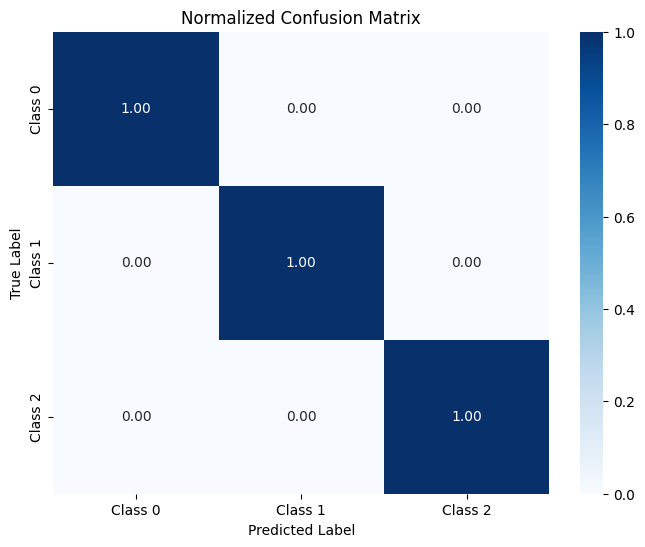

In [77]:
# Compute confusion matrix (normalized confusion matrix)
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular la matriz de confusión
cm = confusion_matrix(y_test, predictions, normalize='true')

# Visualizar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='.2f', cmap='Blues',
             xticklabels=['Class 0', 'Class 1', 'Class 2'],
             yticklabels=['Class 0', 'Class 1', 'Class 2'])
plt.title('Normalized Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()


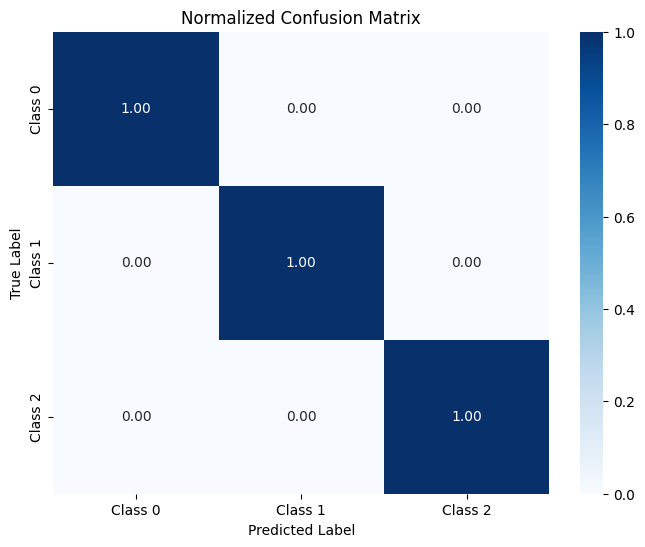

In [78]:
# Plot normalized confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the normalized confusion matrix
cm = confusion_matrix(y_test, predictions, normalize='true')

# Create a heatmap to visualize the normalized confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='.2f', cmap='Blues',
             xticklabels=['Class 0', 'Class 1', 'Class 2'],
             yticklabels=['Class 0', 'Class 1', 'Class 2'])
plt.title('Normalized Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()


# Final remarks

- Evaluation of classification model is critical

- Train and test set have to be mutually exclusive

- There are several alternatives: Holdout, Montecarlo, k-fold, repeated k-fold, Leave P Out (LPO), Leave One Out (LOO), Stratified k-fold

- https://scikit-learn.org/stable/modules/cross_validation.html

# Activity

1) Compare the accuracy of the classification using (a) the four variables, (b) the two Petal variables, and (c) the two Sepal variables. Which provides the best classification accuracy?


2) Using the four variables, try with two classifiers. Which provides the best performance?

In [80]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Define a function to evaluate model performance
def evaluate_model(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    classifier = LogisticRegression()
    classifier.fit(X_train, y_train)
    predictions = classifier.predict(X_test)
    return accuracy_score(y_test, predictions)

# (a) Using four variables
X_all = dataset[["Sepal_Length", "Sepal_Width", "Petal_Length", "Petal_Width"]].values
accuracy_all = evaluate_model(X_all, y)

# (b) Using two Petal variables
X_petal = dataset[["Petal_Length", "Petal_Width"]].values
accuracy_petal = evaluate_model(X_petal, y)

# (c) Using two Sepal variables
X_sepal = dataset[["Sepal_Length", "Sepal_Width"]].values
accuracy_sepal = evaluate_model(X_sepal, y)

# Print the accuracies
print(f"Accuracy using four variables: {accuracy_all:.2f}")
print(f"Accuracy using two Petal variables: {accuracy_petal:.2f}")
print(f"Accuracy using two Sepal variables: {accuracy_sepal:.2f}")

# Define a function to evaluate different classifiers
def evaluate_classifiers(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Logistic Regression
    lr_classifier = LogisticRegression()
    lr_classifier.fit(X_train, y_train)
    lr_predictions = lr_classifier.predict(X_test)
    lr_accuracy = accuracy_score(y_test, lr_predictions)

    # Decision Tree Classifier
    dt_classifier = DecisionTreeClassifier()
    dt_classifier.fit(X_train, y_train)
    dt_predictions = dt_classifier.predict(X_test)
    dt_accuracy = accuracy_score(y_test, dt_predictions)

    return lr_accuracy, dt_accuracy

# Using the four variables to evaluate
lr_accuracy, dt_accuracy = evaluate_classifiers(X_all, y)

# Print the performances
print(f"Logistic Regression Accuracy: {lr_accuracy:.2f}")
print(f"Decision Tree Accuracy: {dt_accuracy:.2f}")


Accuracy using four variables: 1.00
Accuracy using two Petal variables: 1.00
Accuracy using two Sepal variables: 0.82
Logistic Regression Accuracy: 1.00
Decision Tree Accuracy: 1.00
